Data Preprocessing

In [29]:
import pandas as pd
import numpy as np
df= pd.read_csv('../data/clean_data.csv')
display(df)

,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,construction_year,total_area_sqm,nbr_bedrooms,equipped_kitchen,terrace_sqm,garden_sqm,state_building,primary_energy_consumption_sqm,heating_type,other_amenities
0,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,1963.0,100.0,2.0,INSTALLED,5.0,0.0,MISSING,231.0,GAS,1
1,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,2024.0,187.0,3.0,MISSING,0.0,0.0,MISSING,99.0,MISSING,1
2,3500000.0,HOUSE,VILLA,Flanders,West Flanders,Brugge,8300,51.353323,3.296353,1935.0,277.0,6.0,MISSING,0.0,0.0,TO_RENOVATE,394.0,MISSING,0
3,347000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Mechelen,2820,51.024073,4.542449,2011.0,102.0,2.0,INSTALLED,NaN,0.0,MISSING,113.0,GAS,1
4,110000.0,HOUSE,HOUSE,Wallonia,Hainaut,Charleroi,6010,50.393419,4.469180,1918.0,150.0,2.0,INSTALLED,NaN,0.0,TO_RENOVATE,386.0,FUELOIL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24931,320000.0,APARTMENT,APARTMENT,Flanders,East Flanders,Gent,9000,51.027424,3.696983,2023.0,90.0,2.0,HYPER_EQUIPPED,11.0,NaN,MISSING,20.0,MISSING,1
24932,265000.0,HOUSE,HOUSE,Wallonia,Liège,Waremme,4280,50.696639,5.129448,1900.0,165.0,3.0,INSTALLED,15.0,364.0,GOOD,494.0,MISSING,2
24933,255000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2600,51.185968,4.442665,1979.0,105.0,2.0,HYPER_EQUIPPED,9.0,0.0,GOOD,161.0,MISSING,2
24934,285000.0,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3580,51.079377,5.226001,2013.0,185.0,4.0,MISSING,0.0,0.0,MISSING,91.0,GAS,2


encoding data

In [30]:
# frequency_encoding = df['locality'].value_counts()
# df['locality'] = df['locality'].map(frequency_encoding)
# display(df)
df.nunique()

price                              1885
property_type                         2
subproperty_type                     23
region                                3
province                             11
locality                             43
zip_code                            940
latitude                          20287
longitude                         20292
construction_year                   208
total_area_sqm                      707
nbr_bedrooms                         26
equipped_kitchen                      9
terrace_sqm                         177
garden_sqm                         1009
state_building                        7
primary_energy_consumption_sqm     1387
heating_type                          8
other_amenities                       5
dtype: int64

In [31]:
# Encoding columns 
# df = pd.get_dummies(df, columns=['property_type', 'subproperty_type', 'region', 'province', 'locality','state_building' ,'heating_type'],drop_first=True)
# display(df)
# One hot Encoding
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['property_type', 'region', 'heating_type','province','subproperty_type','locality']
encoder = OneHotEncoder(drop='first', sparse_output = False) # sparse=False: Returns a numpy array.
encoder_array = encoder.fit_transform(df[categorical_columns])
encoder_df= pd.DataFrame(encoder_array, columns=encoder.get_feature_names_out()) # Convert the result to a DataFrame
result_df= pd.concat([df.drop(columns=categorical_columns),encoder_df],axis=1)
display(result_df)

,price,zip_code,latitude,longitude,construction_year,total_area_sqm,nbr_bedrooms,equipped_kitchen,terrace_sqm,garden_sqm,...,locality_Soignies,locality_Thuin,locality_Tielt,locality_Tongeren,locality_Tournai,locality_Turnhout,locality_Verviers,locality_Veurne,locality_Virton,locality_Waremme
0,225000.0,2050,51.217172,4.379982,1963.0,100.0,2.0,INSTALLED,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,501000.0,2275,51.238312,4.817192,2024.0,187.0,3.0,MISSING,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3500000.0,8300,51.353323,3.296353,1935.0,277.0,6.0,MISSING,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,347000.0,2820,51.024073,4.542449,2011.0,102.0,2.0,INSTALLED,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,110000.0,6010,50.393419,4.469180,1918.0,150.0,2.0,INSTALLED,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24931,320000.0,9000,51.027424,3.696983,2023.0,90.0,2.0,HYPER_EQUIPPED,11.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24932,265000.0,4280,50.696639,5.129448,1900.0,165.0,3.0,INSTALLED,15.0,364.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24933,255000.0,2600,51.185968,4.442665,1979.0,105.0,2.0,HYPER_EQUIPPED,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24934,285000.0,3580,51.079377,5.226001,2013.0,185.0,4.0,MISSING,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['MISSING','NOT_INSTALLED','USA_UNINSTALLED', 'INSTALLED',
'USA_INSTALLED','SEMI_EQUIPPED','USA_SEMI_EQUIPPED','HYPER_EQUIPPED','USA_HYPER_EQUIPPED']])
result_df['equipped_kitchen'] = encoder.fit_transform(result_df[['equipped_kitchen']])
display(result_df)

,price,zip_code,latitude,longitude,construction_year,total_area_sqm,nbr_bedrooms,equipped_kitchen,terrace_sqm,garden_sqm,...,locality_Soignies,locality_Thuin,locality_Tielt,locality_Tongeren,locality_Tournai,locality_Turnhout,locality_Verviers,locality_Veurne,locality_Virton,locality_Waremme
0,225000.0,2050,51.217172,4.379982,1963.0,100.0,2.0,3.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,501000.0,2275,51.238312,4.817192,2024.0,187.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3500000.0,8300,51.353323,3.296353,1935.0,277.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,347000.0,2820,51.024073,4.542449,2011.0,102.0,2.0,3.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,110000.0,6010,50.393419,4.469180,1918.0,150.0,2.0,3.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24931,320000.0,9000,51.027424,3.696983,2023.0,90.0,2.0,7.0,11.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24932,265000.0,4280,50.696639,5.129448,1900.0,165.0,3.0,3.0,15.0,364.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24933,255000.0,2600,51.185968,4.442665,1979.0,105.0,2.0,7.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24934,285000.0,3580,51.079377,5.226001,2013.0,185.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
encoding_Sate_of_Building = OrdinalEncoder(categories= [['MISSING','TO_RESTORE','TO_RENOVATE',
 'TO_BE_DONE_UP' ,'GOOD','AS_NEW','JUST_RENOVATED']])
result_df['state_building']= encoding_Sate_of_Building.fit_transform(result_df[['state_building']])
display(result_df)

,price,zip_code,latitude,longitude,construction_year,total_area_sqm,nbr_bedrooms,equipped_kitchen,terrace_sqm,garden_sqm,...,locality_Soignies,locality_Thuin,locality_Tielt,locality_Tongeren,locality_Tournai,locality_Turnhout,locality_Verviers,locality_Veurne,locality_Virton,locality_Waremme
0,225000.0,2050,51.217172,4.379982,1963.0,100.0,2.0,3.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,501000.0,2275,51.238312,4.817192,2024.0,187.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3500000.0,8300,51.353323,3.296353,1935.0,277.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,347000.0,2820,51.024073,4.542449,2011.0,102.0,2.0,3.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,110000.0,6010,50.393419,4.469180,1918.0,150.0,2.0,3.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24931,320000.0,9000,51.027424,3.696983,2023.0,90.0,2.0,7.0,11.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24932,265000.0,4280,50.696639,5.129448,1900.0,165.0,3.0,3.0,15.0,364.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24933,255000.0,2600,51.185968,4.442665,1979.0,105.0,2.0,7.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24934,285000.0,3580,51.079377,5.226001,2013.0,185.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
result_df['total_area_sqm'] = result_df['total_area_sqm'].fillna(result_df['total_area_sqm'].median())
result_df['terrace_sqm'] = result_df['terrace_sqm'].fillna(result_df['terrace_sqm'].median())
result_df['garden_sqm'] = result_df['garden_sqm'].fillna(result_df['garden_sqm'].median())


In [35]:
# construction year 
refrence_year= 2024
result_df['construction_year']= refrence_year - df['construction_year']
display(result_df)

,price,zip_code,latitude,longitude,construction_year,total_area_sqm,nbr_bedrooms,equipped_kitchen,terrace_sqm,garden_sqm,...,locality_Soignies,locality_Thuin,locality_Tielt,locality_Tongeren,locality_Tournai,locality_Turnhout,locality_Verviers,locality_Veurne,locality_Virton,locality_Waremme
0,225000.0,2050,51.217172,4.379982,61.0,100.0,2.0,3.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,501000.0,2275,51.238312,4.817192,0.0,187.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3500000.0,8300,51.353323,3.296353,89.0,277.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,347000.0,2820,51.024073,4.542449,13.0,102.0,2.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,110000.0,6010,50.393419,4.469180,106.0,150.0,2.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24931,320000.0,9000,51.027424,3.696983,1.0,90.0,2.0,7.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24932,265000.0,4280,50.696639,5.129448,124.0,165.0,3.0,3.0,15.0,364.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24933,255000.0,2600,51.185968,4.442665,45.0,105.0,2.0,7.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24934,285000.0,3580,51.079377,5.226001,11.0,185.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
unique_values = df['state_building'].unique()
print(unique_values)

['MISSING' 'TO_RENOVATE' 'GOOD' 'AS_NEW' 'JUST_RENOVATED' 'TO_BE_DONE_UP'
 'TO_RESTORE']


In [37]:
X= result_df.drop(['price'],axis=1)
y= result_df['price'].to_numpy().reshape(-1,1)
print(X.shape)
print(y.shape)


(24936, 96)
(24936, 1)


Checking correalation between data 

In [38]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# df_encoded = pd.get_dummies(df, drop_first=True)

# # Select only numeric columns for correlation analysis
# df_numeric = df_encoded.select_dtypes(include=[np.number])

# # Calculate the correlation matrix
# correlation_matrix = df_numeric.corr(method='spearman')

# # Create the heatmap
# plt.figure(figsize=(8,8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
# plt.title('Correlation Heatmap of Property Data')
# plt.show()

Normalizing data using minmaxscalar 

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler= scaler.fit_transform(X)
y_scaler= scaler.fit_transform(y)


Making model

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state= 42, test_size=0.2)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(19948, 96) (4988, 96)
(19948, 1) (4988, 1)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,mean_absolute_error
regressor = LinearRegression()
regressor.fit(X_train, y_train)
display(regressor.score(X_train,y_train))
display(regressor.score(X_test,y_test))
pred=regressor.predict(X_test)
print('RMSE : ', root_mean_squared_error(y_test,pred))
print('Score:', regressor.score(X_train, y_train))
print('MAE :',mean_absolute_error(y_test, pred))

0.4618375448794264

0.42755599620525353

RMSE :  349050.53177024506
Score: 0.4618375448794264
MAE : 157736.80370012665


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
random_reg= RandomForestRegressor( n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=2)
random_reg.fit(X_train,y_train)
display('Trainig Score:',random_reg.score(X_train,y_train))
display('Testing Score:',random_reg.score(X_test,y_test))
pred_rand=random_reg.predict(X_test)
print('RMSE : ', root_mean_squared_error(y_test,pred_rand))
print('Score:', random_reg.score(X_train, y_train))
print('MAE :',mean_absolute_error(y_test, pred_rand))

c:\Users\Vinay\Desktop\Becode\immo-eliza-ml\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9270047029917543

0.8131327445737928

RMSE :  199429.04161444766
Score: 0.9270047029917543
MAE : 93743.94456839304


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(random_reg, X_train, y_train, scoring='r2')
print(f"Cross-validation R^2 scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")


c:\Users\Vinay\Desktop\Becode\immo-eliza-ml\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Vinay\Desktop\Becode\immo-eliza-ml\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Vinay\Desktop\Becode\immo-eliza-ml\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Vinay\Desktop\Becode\immo-eliza-ml\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vec

Cross-validation R^2 scores: [0.83431894 0.74372435 0.79966247 0.76405261 0.76301416]
Average cross-validation score: 0.7809545071067742


Text(0.5, 1.0, 'Random Forest')

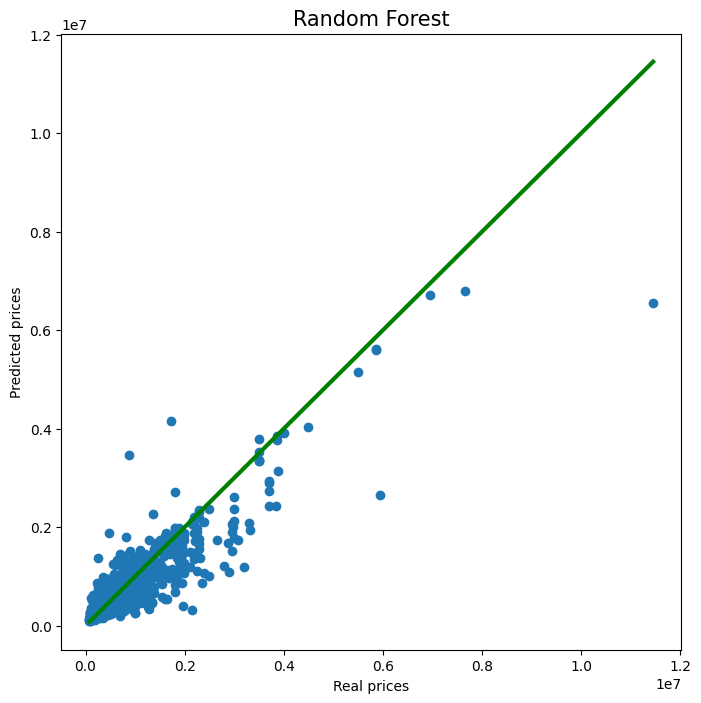

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.subplots(figsize = (8,8))

plt.scatter(y_test, pred_rand)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', lw=3)
plt.xlabel("Real prices", size=10)
plt.ylabel("Predicted prices", size=10)
plt.title("Random Forest", size=15)